# Data Wrangling Project - Abhishek Patria

## Gathering Data

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import time
import json
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

#### Downloading image predictions file

In [ ]:
image_predictions_URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

image_predictions_requests = requests.get(image_predictions_URL)

#### Writing files to disk

In [ ]:
with open('image_predictions.csv', mode='wb') as file:
    file.write(image_predictions_requests.content)

#### Reading files and assigning to dataframes

In [2]:
image_predictions = pd.read_csv('image_predictions.csv', sep='\t')
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

#### Creating a Twitter API Object

In [ ]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler = auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

#### Querying the Twitter API for each tweet ID and storing the JSON in a list

In [ ]:
#tweet_details = {}
tweet_details_json = {}
tweet_query_errors = []
for tweet_id in twitter_archive_enhanced.tweet_id:
    
    start_time = time.perf_counter()
    
    try:
        print("Querying Tweet ID: ", tweet_id)
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        #tweet_details[str(tweet_id)] = tweet
        tweet_details_json[str(tweet_id)] = tweet._json
    
    except tweepy.TweepError:
        print("Query error for Tweet ID:", tweet_id)
        tweet_query_errors.append(str(tweet_id))
    
    end_time = time.perf_counter()
    run_time = end_time - start_time
    print("Query Runtime: ", run_time)


#### Writing the JSON dump to a text file

In [ ]:
with open('tweet_json.txt', mode='w') as outfile:
    json.dump(tweet_details_json, outfile, sort_keys = True, indent=4, ensure_ascii = False)

#### Reading the JSON file and creating pandas dataframe

In [3]:
tweet_details = pd.read_json('tweet_json.txt', orient='index')

#### For better readibility of text column

In [4]:
pd.set_option('display.max_colwidth', -1)

## Assessing Data

#### Programmatic inspection of data

In [5]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [7]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [9]:
tweet_details.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2345 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2345 non-null datetime64[ns]
display_text_range               2345 non-null object
entities                         2345 non-null object
extended_entities                2069 non-null object
favorite_count                   2345 non-null int64
favorited                        2345 non-null int64
full_text                        2345 non-null object
geo                              0 non-null float64
id                               2345 non-null int64
id_str                           2345 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              

In [10]:
tweet_details.describe()

,contributors,coordinates,favorite_count,favorited,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,truncated
count,0.0,0.0,2345.000000,2345.0,0.0,2.345000e+03,2.345000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2345.000000,2207.0,2207.0,2.700000e+01,2.700000e+01,2345.000000,2345.0,2345.0
mean,NaN,NaN,8098.628145,0.0,NaN,7.422940e+17,7.422940e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.013220,0.0,0.0,8.190431e+17,8.190431e+17,3042.817058,0.0,0.0
std,NaN,NaN,12182.076024,0.0,NaN,6.833642e+16,6.833642e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.114238,0.0,0.0,5.567966e+16,5.567966e+16,5058.847493,0.0,0.0
min,NaN,NaN,0.000000,0.0,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.000000,0.0,0.0,7.061659e+17,7.061659e+17,0.000000,0.0,0.0
25%,NaN,NaN,1408.000000,0.0,NaN,6.783802e+17,6.783802e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.000000,0.0,0.0,7.924710e+17,7.924710e+17,609.000000,0.0,0.0
50%,NaN,NaN,3549.000000,0.0,NaN,7.189392e+17,7.189392e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.000000,0.0,0.0,8.340867e+17,8.340867e+17,1424.000000,0.0,0.0
75%,NaN,NaN,10017.000000,0.0,NaN,7.986979e+17,7.986979e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.000000,0.0,0.0,8.611580e+17,8.611580e+17,3548.000000,0.0,0.0
max,NaN,NaN,143960.000000,0.0,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,1.000000,0.0,0.0,8.860534e+17,8.860534e+17,77727.000000,0.0,0.0


#### Visual inspection of data

In [11]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [12]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [13]:
tweet_details

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"[0, 131]","{'hashtags': [], 'media': [{'display_url': 'pic.twitter.com/BLDqew2Ijj', 'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1', 'id': 666020881337073664, 'id_str': '666020881337073664', 'indices': [108, 131], 'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'sizes': {'large': {'h': 720, 'resize': 'fit', 'w': 960}, 'medium': {'h': 720, 'resize': 'fit', 'w': 960}, 'small': {'h': 510, 'resize': 'fit', 'w': 680}, 'thumb': {'h': 150, 'resize': 'crop', 'w': 150}}, 'type': 'photo', 'url': 'https://t.co/BLDqew2Ijj'}], 'symbols': [], 'urls': [], 'user_mentions': []}","{'media': [{'display_url': 'pic.twitter.com/BLDqew2Ijj', 'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1', 'id': 666020881337073664, 'id_str': '666020881337073664', 'indices': [108, 131], 'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'sizes': {'large': {'h': 720, 'resize': 'fit', 'w': 960}, 'medium': {'h': 720, 'resize': 'fit', 'w': 960}, 'small': {'h': 510, 'resize': 'fit', 'w': 680}, 'thumb': {'h': 150, 'resize': 'crop', 'w': 150}}, 'type': 'photo', 'url': 'https://t.co/BLDqew2Ijj'}]}",2559,0,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,...,0.0,NaN,NaN,NaN,521,0,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",0,"{'contributors_enabled': False, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'default_profile': False, 'default_profile_image': False, 'description': 'Your Only Source for Professional Dog Ratings STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs | MOBILE APP: @GoodDogsGame Business: dogratingtwitter@gmail.com', 'entities': {'description': {'urls': []}, 'url': {'urls': [{'display_url': 'weratedogs.com', 'expanded_url': 'http://weratedogs.com', 'indices': [0, 23], 'url': 'https://t.co/N7sNNHAEXS'}]}}, 'favourites_count': 132919, 'follow_request_sent': False, 'followers_count': 6535392, 'following': False, 'friends_count': 103, 'geo_enabled': True, 'has_extended_profile': True, 'id': 4196983835, 'id_str': '4196983835', 'is_translation_enabled': False, 'is_translator': False, 'lang': 'en', 'listed_count': 4122, 'location': '𝓶𝓮𝓻𝓬𝓱 ↴ DM YOUR DOGS', 'name': 'WeRateDogs™', 'notifications': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1515037507', 'profile_image_url': 'http://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'protected': False, 'screen_name': 'dog_rates', 'statuses_count': 6852, 'time_zone': None, 'translator_type': 'none', 'url': 'https://t.co/N7sNNHAEXS', 'utc_offset': None, 'verified': True}"
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"[0, 139]","{'hashtags': [], 'media': [{'display_url': 'pic.twitter.com/r7mOb2m0UI', 'expanded_url': 'https://twitter.com/dog_rates/status/666029285002620928/photo/1', 'id': 666029276303482880, 'id_str': '666029276303482880', '

#### Quality Issues


* Retweets in the dataframes
* Incorrect dog names
* Missing values in `name` and `dog stages` showing as 'None'
* Erroneous datatypes (timestamp, source, dog stages, tweet_id, in_reply_to_status_id, in_reply_to_user_id)
* Tweets having no images
* amp& instead of & in `text` column
* `source` column contains html and tags instead of only the source type
* Dog `ratings` have been truncated at decimal and do not represent the actual rating being float in nature



#### Tidy Issues


* Dog `stages` in different columns instead of being in one
* Linking and joining the three tables into a single table

## Cleaning Data

#### Copying the raw dataframes so that we can compare the cleaned oen later

In [14]:
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
tweet_details_clean = tweet_details.copy()

#### Linking and doing left joins on twitter_archive_enhanced_clean, and image_predictions and 

**Define:**

**Code:**

In [15]:
twitter_archive_enhanced_clean = pd.merge(left=twitter_archive_enhanced_clean, right=tweet_details_clean, how='inner', left_on='tweet_id', right_on='id')
twitter_archive_enhanced_clean = pd.merge(left=twitter_archive_enhanced_clean, right=image_predictions_clean, how='inner', on='tweet_id') 

**Test:**

In [16]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1347 entries, 0 to 1346
Data columns (total 59 columns):
tweet_id                         1347 non-null int64
in_reply_to_status_id_x          15 non-null float64
in_reply_to_user_id_x            15 non-null float64
timestamp                        1347 non-null object
source_x                         1347 non-null object
text                             1347 non-null object
retweeted_status_id              47 non-null float64
retweeted_status_user_id         47 non-null float64
retweeted_status_timestamp       47 non-null object
expanded_urls                    1347 non-null object
rating_numerator                 1347 non-null int64
rating_denominator               1347 non-null int64
name                             1347 non-null object
doggo                            1347 non-null object
floofer                          1347 non-null object
pupper                           1347 non-null object
puppo                            1347 

#### Removing unrequired columns and renaming the existing ones

**Define:** Remove the unrequired column and duplicated columns that arose due to the dataframes' joins

**Code:**

In [17]:
#Listing the columns to be deleted
columns_to_be_deleted = ['contributors', 'coordinates', 'geo', 'id', 'id_str', 'in_reply_to_status_id_y', 
                         'in_reply_to_status_id_str', 'in_reply_to_user_id_y', 'in_reply_to_user_id_str',
                         'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'retweeted', 'retweeted_status',
                         'source_y', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']

#Dropping unrequired columns
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(columns_to_be_deleted, axis=1)


#Renaming columns changed dute to merge and join
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.rename(index=str, columns={"in_reply_to_status_id_x":"in_reply_to_status_id",
                                                          "in_reply_to_user_id_x":"in_reply_to_user_id" ,
                                                          "source_x":"source"})

**Test:**

In [18]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1347 entries, 0 to 1346
Data columns (total 35 columns):
tweet_id                         1347 non-null int64
in_reply_to_status_id            15 non-null float64
in_reply_to_user_id              15 non-null float64
timestamp                        1347 non-null object
source                           1347 non-null object
text                             1347 non-null object
retweeted_status_id              47 non-null float64
retweeted_status_user_id         47 non-null float64
retweeted_status_timestamp       47 non-null object
expanded_urls                    1347 non-null object
rating_numerator                 1347 non-null int64
rating_denominator               1347 non-null int64
name                             1347 non-null object
doggo                            1347 non-null object
floofer                          1347 non-null object
pupper                           1347 non-null object
puppo                            1347 non-n

#### Retweets in the dataframes

**Define:** Remove the retweets in the tables

**Code:**

In [19]:
#Dropping the retweeted rows from the dataframe
twitter_archive_enhanced_clean.drop(
    twitter_archive_enhanced_clean[pd.notnull(twitter_archive_enhanced_clean['retweeted_status_id'])].index, inplace = True)

**Test:**

In [20]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 0 to 1346
Data columns (total 35 columns):
tweet_id                         1300 non-null int64
in_reply_to_status_id            15 non-null float64
in_reply_to_user_id              15 non-null float64
timestamp                        1300 non-null object
source                           1300 non-null object
text                             1300 non-null object
retweeted_status_id              0 non-null float64
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null object
expanded_urls                    1300 non-null object
rating_numerator                 1300 non-null int64
rating_denominator               1300 non-null int64
name                             1300 non-null object
doggo                            1300 non-null object
floofer                          1300 non-null object
pupper                           1300 non-null object
puppo                            1300 non-null

**Define:** Correct the incorrect dog names where the `name` column contains a lowercase word or 'None'.  *(Assumption: Names in capitalcase except 'None' are assumed to have correct names.)*

**Code:**

In [21]:
#Creating a boolean list of incorect names
incorrect_names = (twitter_archive_enhanced_clean.name.str.islower()) | (twitter_archive_enhanced_clean.name == 'None')



#Two cases where the dog's name can be corrected is when the `text` has 'name is' or 'named'. For other cases we put the name as 'None'
incorrect_containing_name_is = twitter_archive_enhanced_clean[(incorrect_names) & 
                                                              (twitter_archive_enhanced_clean.text.str.contains('name is'))]

incorrect_containing_named = twitter_archive_enhanced_clean[(incorrect_names) & 
                                                            (twitter_archive_enhanced_clean.text.str.contains('named'))]


#Finding names using regex and storing them in a dataframe
name_is_corrections = incorrect_containing_name_is.text.str.extract(('name is\s(\w+) '))
named_corrections = incorrect_containing_named.text.str.extract(('named\s(\w+) '))


#Correcting names using loops
for index_val in name_is_corrections[pd.notnull(name_is_corrections)].index:
     twitter_archive_enhanced_clean.loc[index_val, 'name'] = name_is_corrections.loc[index_val,]

for index_val in named_corrections[pd.notnull(named_corrections)].index:
     twitter_archive_enhanced_clean.loc[index_val, 'name'] = named_corrections.loc[index_val,]
        

#Renaming the remaining lowercase with 'None'
remaining_names = (twitter_archive_enhanced_clean.name.str.islower())
twitter_archive_enhanced_clean.loc[remaining_names,'name'] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()


**Test:**

In [22]:
twitter_archive_enhanced_clean.name.sort_values()

524     Abby        
1056    Acro        
698     Adele       
1057    Aiden       
43      Aja         
217     Akumi       
430     Albert      
187     Albus       
574     Aldrick     
622     Alexanderson
221     Alf         
869     Alfie       
1267    Alfie       
31      Alfy        
801     Amber       
701     Ambrose     
1151    Amy         
1232    Amélie      
375     Anakin      
1196    Andru       
1157    Andy        
1142    Anthony     
904     Apollo      
537     Aqua        
0       Archie      
782     Archie      
519     Arlen       
102     Arya        
974     Ash         
906     Asher       
        ...         
1327    Walter      
366     Wesley      
388     Willem      
934     William     
153     Willow      
1176    Willy       
943     Wilson      
149     Wilson      
1237    Winifred    
381     Winnie      
265     Winnie      
133     Winnie      
649     Winston     
139     Winston     
185     Winston     
502     Winston     
1190    Winst

#### Tweets having no images

**Define:** Remove the tweets with no image url as they will not be helpful in breed prediction

**Code:**

In [23]:
#URLs which link to videos or GIFs are nto helpful for the breed prediction model and thus can be discarded.
#Also, the twitter URLs with pics have the word 'photo' at the end

expanded_urls_without_photos = twitter_archive_enhanced_clean[~twitter_archive_enhanced_clean.expanded_urls.str.contains('photo', na=False)].index
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(expanded_urls_without_photos)

**Test:**

In [24]:
~twitter_archive_enhanced_clean[~twitter_archive_enhanced_clean.expanded_urls.str.contains('photo', na=False)].count()

tweet_id                        -1
in_reply_to_status_id           -1
in_reply_to_user_id             -1
timestamp                       -1
source                          -1
text                            -1
retweeted_status_id             -1
retweeted_status_user_id        -1
retweeted_status_timestamp      -1
expanded_urls                   -1
rating_numerator                -1
rating_denominator              -1
name                            -1
doggo                           -1
floofer                         -1
pupper                          -1
puppo                           -1
created_at                      -1
display_text_range              -1
entities                        -1
extended_entities               -1
favorite_count                  -1
favorited                       -1
full_text                       -1
in_reply_to_screen_name         -1
is_quote_status                 -1
lang                            -1
place                           -1
possibly_sensitive  

#### 'amp&;' instead of '&' in text column

**Define:** Replace &amp with & in the text column

**Code:**

In [25]:
twitter_archive_enhanced_clean.text = twitter_archive_enhanced_clean.text.str.replace('&amp;', '&')

**Test:**

In [26]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.str.contains('&amp;')].text

Series([], Name: text, dtype: object)

#### Source column contains html and tags instead of only the source type

**Define:** Remove the html from the column and isolate only the end part just before the </a\> tag

**Code:**

In [27]:
twitter_archive_enhanced_clean.source = twitter_archive_enhanced_clean.source.str.extract('>(.+)<')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


**Test:**

In [28]:
twitter_archive_enhanced_clean.source.value_counts()

Twitter for iPhone    1229
Twitter Web Client    15  
TweetDeck             9   
Name: source, dtype: int64

#### Dog stages in different columns instead being in one

**Define:** Extract dog stage from text column and drop the existing column for every stage

**Code:**

In [29]:
#Extracting dog stages
twitter_archive_enhanced_clean['dogstage'] = twitter_archive_enhanced_clean.text.str.extract('(doggo|floofer|pupper|puppo)')

#Removing unnecessary columns
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['doggo','floofer','pupper','puppo'], axis=1)

#Instead of melting and then removing rows which have 'None', this method seems more advantageous.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


**Test:**

In [30]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.name=='None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,lang,place,possibly_sensitive,possibly_sensitive_appealable,retweet_count,truncated,user,jpg_url,img_num,dogstage
3,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,...,en,None,0.0,0.0,3155,0,"{'contributors_enabled': False, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'default_profile': False, 'default_profile_image': False, 'description': 'Your Only Source for Professional Dog Ratings STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs | MOBILE APP: @GoodDogsGame Business: dogratingtwitter@gmail.com', 'entities': {'description': {'urls': []}, 'url': {'urls': [{'display_url': 'weratedogs.com', 'expanded_url': 'http://weratedogs.com', 'indices': [0, 23], 'url': 'https://t.co/N7sNNHAEXS'}]}}, 'favourites_count': 132916, 'follow_request_sent': False, 'followers_count': 6534749, 'following': False, 'friends_count': 103, 'geo_enabled': True, 'has_extended_profile': True, 'id': 4196983835, 'id_str': '4196983835', 'is_translation_enabled': False, 'is_translator': False, 'lang': 'en', 'listed_count': 4108, 'location': '𝓶𝓮𝓻𝓬𝓱 ↴ DM YOUR DOGS', 'name': 'WeRateDogs™', 'notifications': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1515037507', 'profile_image_url': 'http://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'protected': False, 'screen_name': 'dog_rates', 'statuses_count': 6852, 'time_zone': None, 'translator_type': 'none', 'url': 'https://t.co/N7sNNHAEXS', 'utc_offset': None, 'verified': True}",https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,NaN
4,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",...,en,None,0.0,0.0,19159,0,"{'contributors_enabled': False, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'default_profile': False, 'default_profile_image': False, 'description': 'Your Only Source for Professional Dog Ratings STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs | MOBILE APP: @GoodDogsGame Business: dogratingtwitter@gmail.com', 'entities': {'description': {'urls': []}, 'url': {'urls': [{'display_url': 'weratedogs.com', 'expanded_url': 'http://weratedogs.com', 'indices': [0, 23], 'url': 'https://t.co/N7sNNHAEXS'}]}}, 'favourites_count': 132916, 'follow_request_sent': False, 'followers_count': 6534749, 'following': False, 'friends_count': 103, 'geo_enabled': True, 'has_extended_profile': True, 'id': 4196983835, 'id_str': '4196983835', 'is_translation_enabled': False, 'is_translator': False, 'lang': 'en', 'listed_count': 4108, 'location': '𝓶𝓮𝓻𝓬𝓱 ↴ DM YOUR DOGS', 'name': 'WeRateDogs™', 'notifications': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'pr

#### Missing values in name and dogstage showing as 'None' instead of NaN

**Define:**  Replacing 'None' in name with NaN (already done for dogstage during its structure correction)

**Code:**

In [31]:
twitter_archive_enhanced_clean.name = twitter_archive_enhanced_clean.name.replace('None', np.NaN)

**Test:**

In [32]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,lang,place,possibly_sensitive,possibly_sensitive_appealable,retweet_count,truncated,user,jpg_url,img_num,dogstage


#### Correcting erroneous datatypes

**Define:** Changing the following datatypes

timestamp to datetime

source to category

dogstage to category

tweet_id to string

in_reply_to_status_id

in_reply_to_user_id

**Code:**

In [33]:
twitter_archive_enhanced_clean.timestamp = pd.to_datetime(twitter_archive_enhanced_clean.timestamp)
twitter_archive_enhanced_clean.source = twitter_archive_enhanced_clean.source.astype('category')
twitter_archive_enhanced_clean.dogstage = twitter_archive_enhanced_clean.dogstage.astype('category')
twitter_archive_enhanced_clean.tweet_id = twitter_archive_enhanced_clean.tweet_id.astype('str')
twitter_archive_enhanced_clean.in_reply_to_status_id = twitter_archive_enhanced_clean.in_reply_to_status_id.astype('str')
twitter_archive_enhanced_clean.in_reply_to_user_id = twitter_archive_enhanced_clean.in_reply_to_user_id.astype('str')

twitter_archive_enhanced_clean.in_reply_to_status_id = twitter_archive_enhanced_clean.in_reply_to_status_id.replace('nan',np.nan)
twitter_archive_enhanced_clean.in_reply_to_user_id = twitter_archive_enhanced_clean.in_reply_to_user_id.astype('str')

**Test:**

In [34]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1253 entries, 0 to 1346
Data columns (total 32 columns):
tweet_id                         1253 non-null object
in_reply_to_status_id            14 non-null object
in_reply_to_user_id              1253 non-null object
timestamp                        1253 non-null datetime64[ns]
source                           1253 non-null category
text                             1253 non-null object
retweeted_status_id              0 non-null float64
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null object
expanded_urls                    1253 non-null object
rating_numerator                 1253 non-null int64
rating_denominator               1253 non-null int64
name                             849 non-null object
created_at                       1253 non-null datetime64[ns]
display_text_range               1253 non-null object
entities                         1253 non-null object
extended_entities           

#### Incorrect ratings and decimals not incorporated in ratings

**Define:**

**Code:**

In [35]:
#Isolating the entries for multiple */*
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")][['tweet_id','text','name','rating_numerator','rating_denominator']]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,name,rating_numerator,rating_denominator
367,777684233540206592,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",NaN,12,10
510,747600769478692864,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,Bookstore,10,10
605,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,4,20
785,694352839993344000,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random & can't bark for shit. 10/10 & 5/10 https://t.co/6NgsQJuSBJ,Oliviér,10,10
1033,674737130913071104,Meet Rufio. He is unaware of the pink legless pupper wrapped around him. Might want to get that checked 10/10 & 4/10 https://t.co/KNfLnYPmYh,Rufio,10,10
1037,674646392044941312,Two gorgeous dogs here. Little waddling dog is a rebel. Refuses to look at camera. Must be a preteen. 5/10 & 8/10 https://t.co/YPfw7oahbD,NaN,5,10
1078,673295268553605120,Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https://t.co/U36HYQIijg,Eve,8,10
1103,672248013293752320,10/10 for dog. 7/10 for cat. 12/10 for human. Much skill. Would pet all https://t.co/uhx5gfpx5k,NaN,10,10
1174,670434127938719744,Meet Hank and Sully. Hank is very proud of the pumpkin they found and Sully doesn't give a shit. 11/10 and 8/10 https://t.co/cwoP1ftbrj,Hank,11,10
1220,669037058363662336,"Here we have Pancho and Peaches. Pancho is a Condoleezza Gryffindor, and Peaches is just an asshole. 10/10 & 7/10 https://t.co/Lh1BsJrWPp",NaN,10,10


In [36]:
#Isolating entries for decimal ratings
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id','text','name','rating_numerator','rating_denominator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,name,rating_numerator,rating_denominator
26,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",Bella,5,10
326,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",Logan,75,10
365,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,Sophie,27,10


In [37]:
#Following entried need to be corrected
ratings_corrections_numerator = {
    '722974582966214656':13,
    '666287406224695296':9,
    '883482846933004288':13.5,
    '786709082849828864':9.75,
    '778027034220126208':11.27
}

ratings_corrections_denominator = {
    '722974582966214656':10,
    '666287406224695296':10
}

In [38]:
#Correcting numerators and denominators

for entry in ratings_corrections_numerator:
    twitter_archive_enhanced_clean.loc[lambda df: df.tweet_id == entry, 'rating_numerator'] = ratings_corrections_numerator[entry]
    
for entry in ratings_corrections_denominator:
    twitter_archive_enhanced_clean.loc[lambda df: df.tweet_id == entry, 'rating_denominator'] = ratings_corrections_denominator[entry]

### Saving

In [39]:
#Saving the cleaned dataframe into a file
twitter_archive_enhanced_clean.to_csv('twitter_archive_enhanced_master.csv')

## Analysing

Text(0.5,1,'Correlation Map')

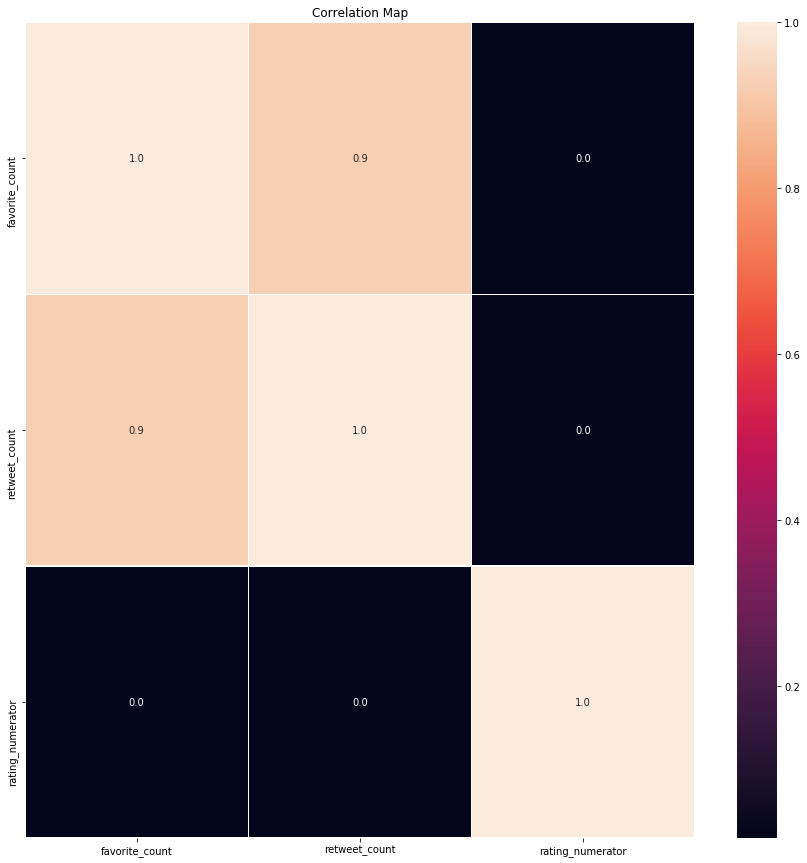

In [40]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(twitter_archive_enhanced_clean[['source', 'favorite_count',
                       'retweet_count', 'rating_numerator']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation Map')

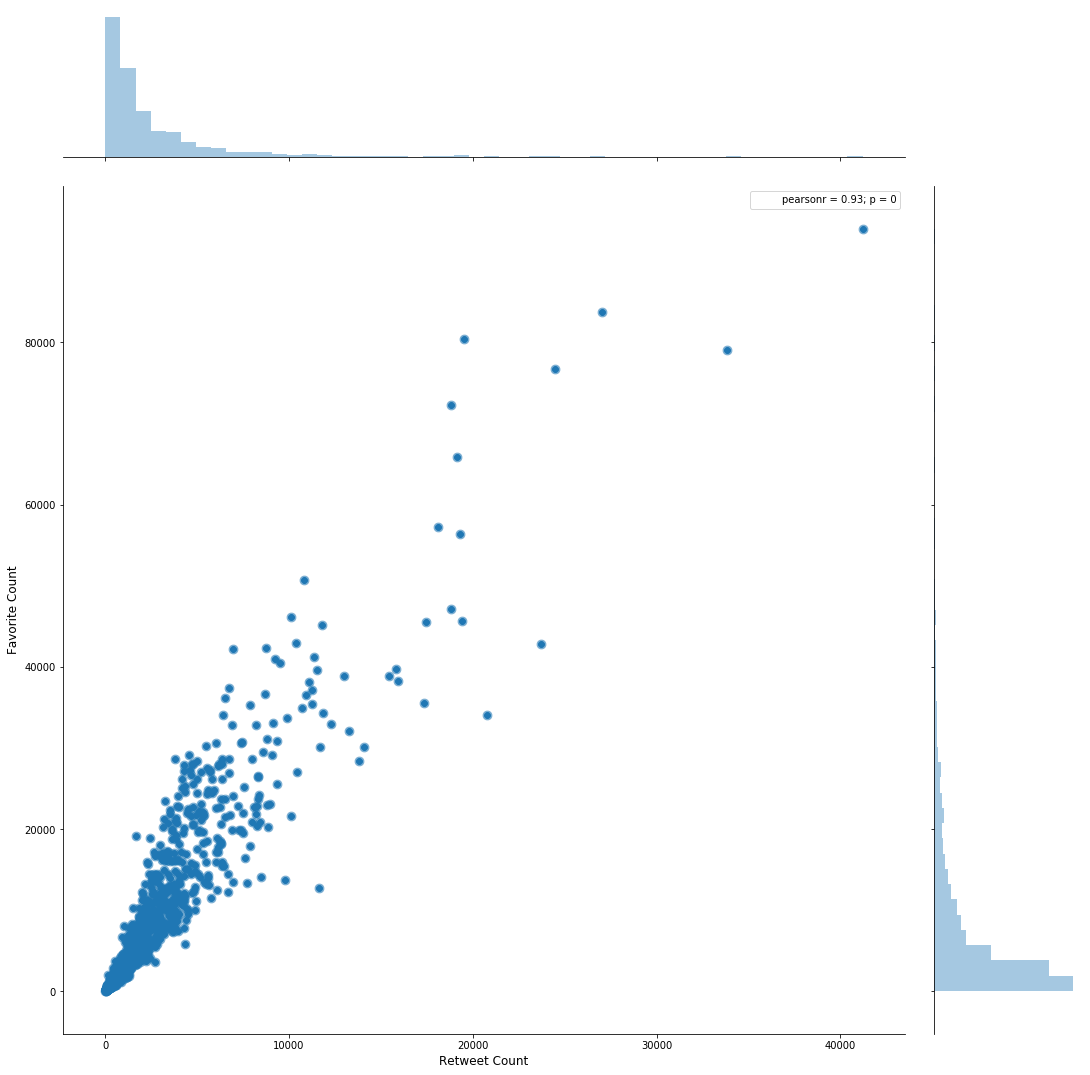

In [41]:
jp = sns.jointplot(x="retweet_count", 
                  y="favorite_count",
                 data=twitter_archive_enhanced_clean,
                 size=15)
jp.plot_joint(plt.scatter,  
             s=80, 
             linewidth=1,
             alpha=0.45)
jp.set_axis_labels("Retweet Count", "Favorite Count",fontsize=12)

Text(0,0.5,'Ratio')

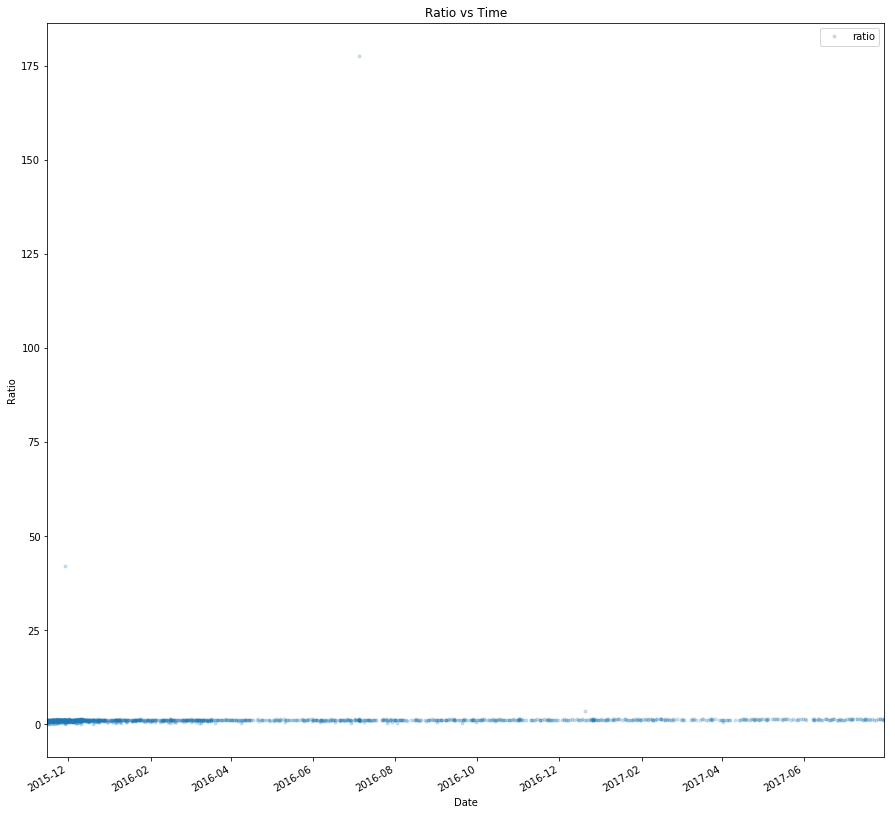

In [42]:
twitter_archive_enhanced_clean['ratio'] = twitter_archive_enhanced_clean.rating_numerator/twitter_archive_enhanced_clean.rating_denominator
twitter_archive_enhanced_clean.plot(y ='ratio', x='timestamp', style = '.', alpha = .2, figsize=(15, 15))
plt.title('Ratio vs Time')
plt.xlabel('Date')
plt.ylabel('Ratio')

Text(0,0.5,'Ratio')

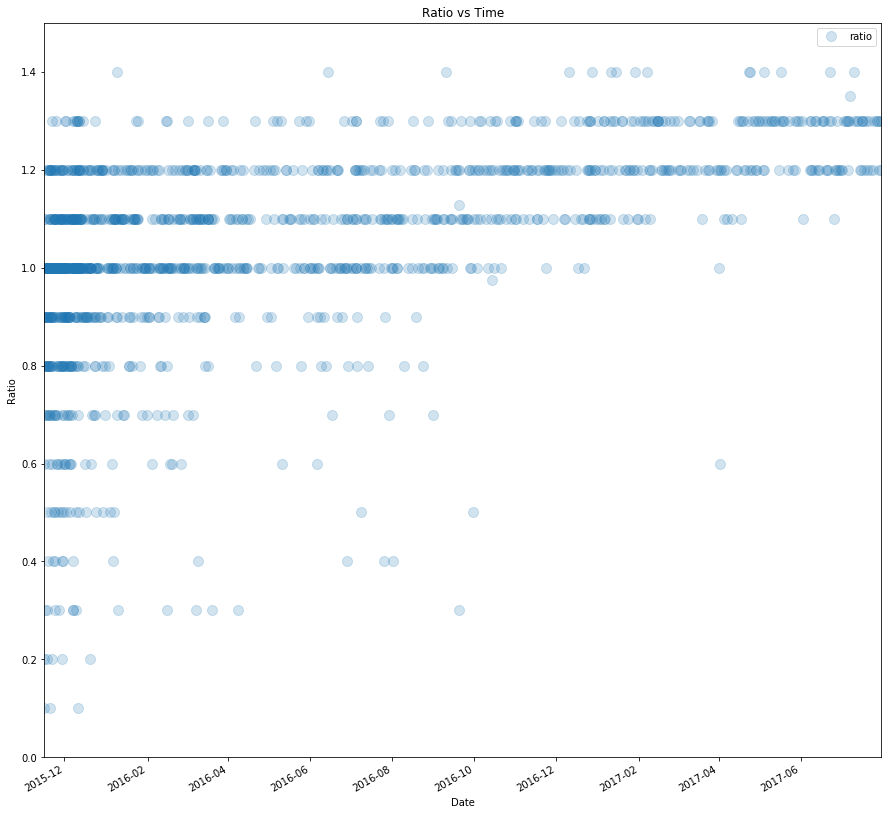

In [43]:
twitter_archive_enhanced_clean.plot(y ='ratio', x='timestamp', style = '.', alpha = .2, 
                                    figsize=(15, 15), ylim=[0,1.5], markersize=20)
plt.title('Ratio vs Time')
plt.xlabel('Date')
plt.ylabel('Ratio')

In [44]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1253 entries, 0 to 1346
Data columns (total 33 columns):
tweet_id                         1253 non-null object
in_reply_to_status_id            14 non-null object
in_reply_to_user_id              1253 non-null object
timestamp                        1253 non-null datetime64[ns]
source                           1253 non-null category
text                             1253 non-null object
retweeted_status_id              0 non-null float64
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null object
expanded_urls                    1253 non-null object
rating_numerator                 1253 non-null float64
rating_denominator               1253 non-null int64
name                             849 non-null object
created_at                       1253 non-null datetime64[ns]
display_text_range               1253 non-null object
entities                         1253 non-null object
extended_entities         